In [2]:
# import libraries

import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [75]:
df= pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.shape

(768, 9)

In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
df.duplicated().sum()

np.int64(0)

From the above data exploration analysis we find that:
- There are 9 cols and 768 rows.
- There is no NULL values in the dataset.
- Looks like there are outliers in many cols.
- No duplicated record.
- All columns data type either int or float.
- The data need to be standarized/scaled.

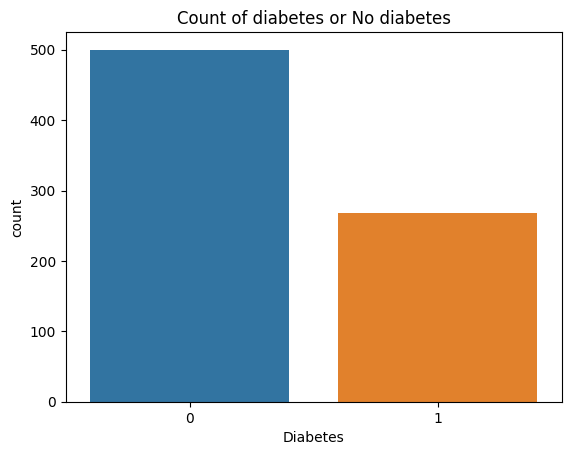

In [8]:
sns.countplot(x='Outcome', data=df, hue='Outcome', legend=False)
plt.title('Count of diabetes or No diabetes')
plt.xlabel('Diabetes')
plt.show()

In [9]:
no_diabetes = round((len(df[df['Outcome']== 0]) / len(df)) * 100,2)
with_diabetes = round((len(df[df['Outcome']== 1]) / len(df)) * 100, 2)
print(f'percentage of no_diabetes = {no_diabetes}')
print(f'percentage of with_diabetes = {with_diabetes}')

percentage of no_diabetes = 65.1
percentage of with_diabetes = 34.9


- The outcome is not balanced. It's biase to no_diabetes.

Feature Engineering
Age Grouping

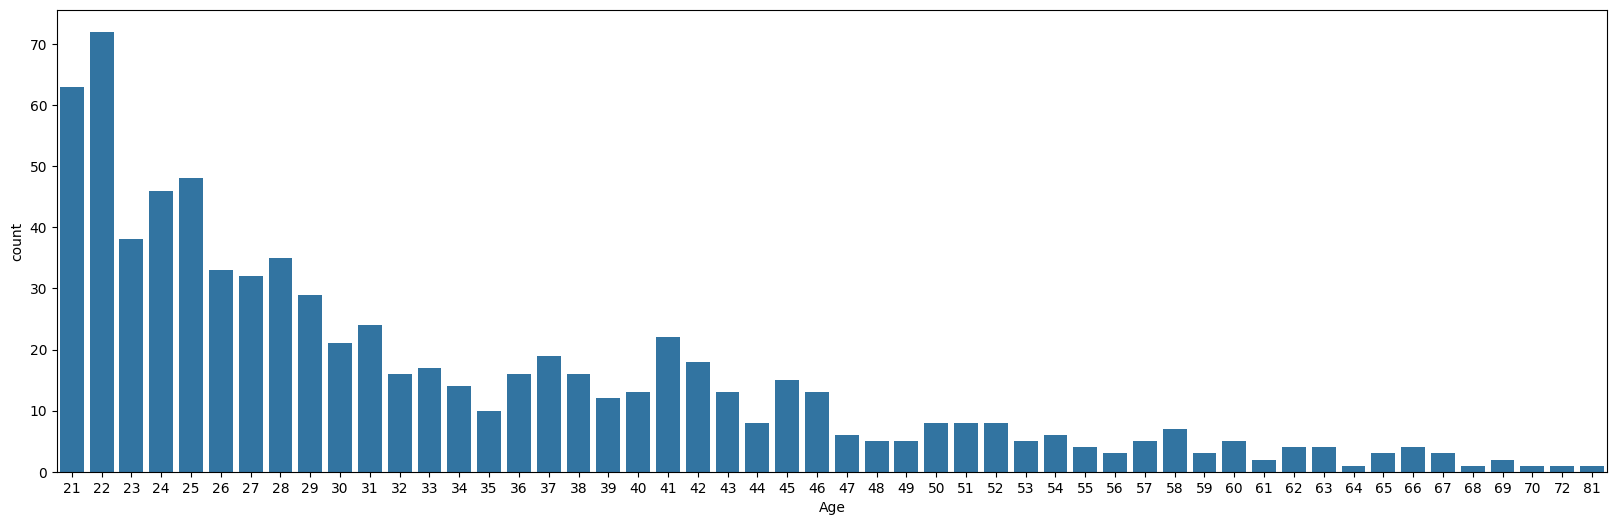

In [40]:
plt.figure(figsize=(20, 6))
sns.countplot(x='Age', data=df)
plt.show()

In [76]:
bins = [20, 25, 30, 35, 40, 45, 50, 60, 81]
labels = ['20-24','25-29', '30-34', '35-39', '40-44', '45-49', '50-59', '60-81' ]
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

df.head(20)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,AgeGroup
0,6,148,72,35,0,33.6,0.627,50,1,50-59
1,1,85,66,29,0,26.6,0.351,31,0,30-34
2,8,183,64,0,0,23.3,0.672,32,1,30-34
3,1,89,66,23,94,28.1,0.167,21,0,20-24
4,0,137,40,35,168,43.1,2.288,33,1,30-34
5,5,116,74,0,0,25.6,0.201,30,0,30-34
6,3,78,50,32,88,31.0,0.248,26,1,25-29
7,10,115,0,0,0,35.3,0.134,29,0,25-29
8,2,197,70,45,543,30.5,0.158,53,1,50-59
9,8,125,96,0,0,0.0,0.232,54,1,50-59


## 1. Dealing with the outliers

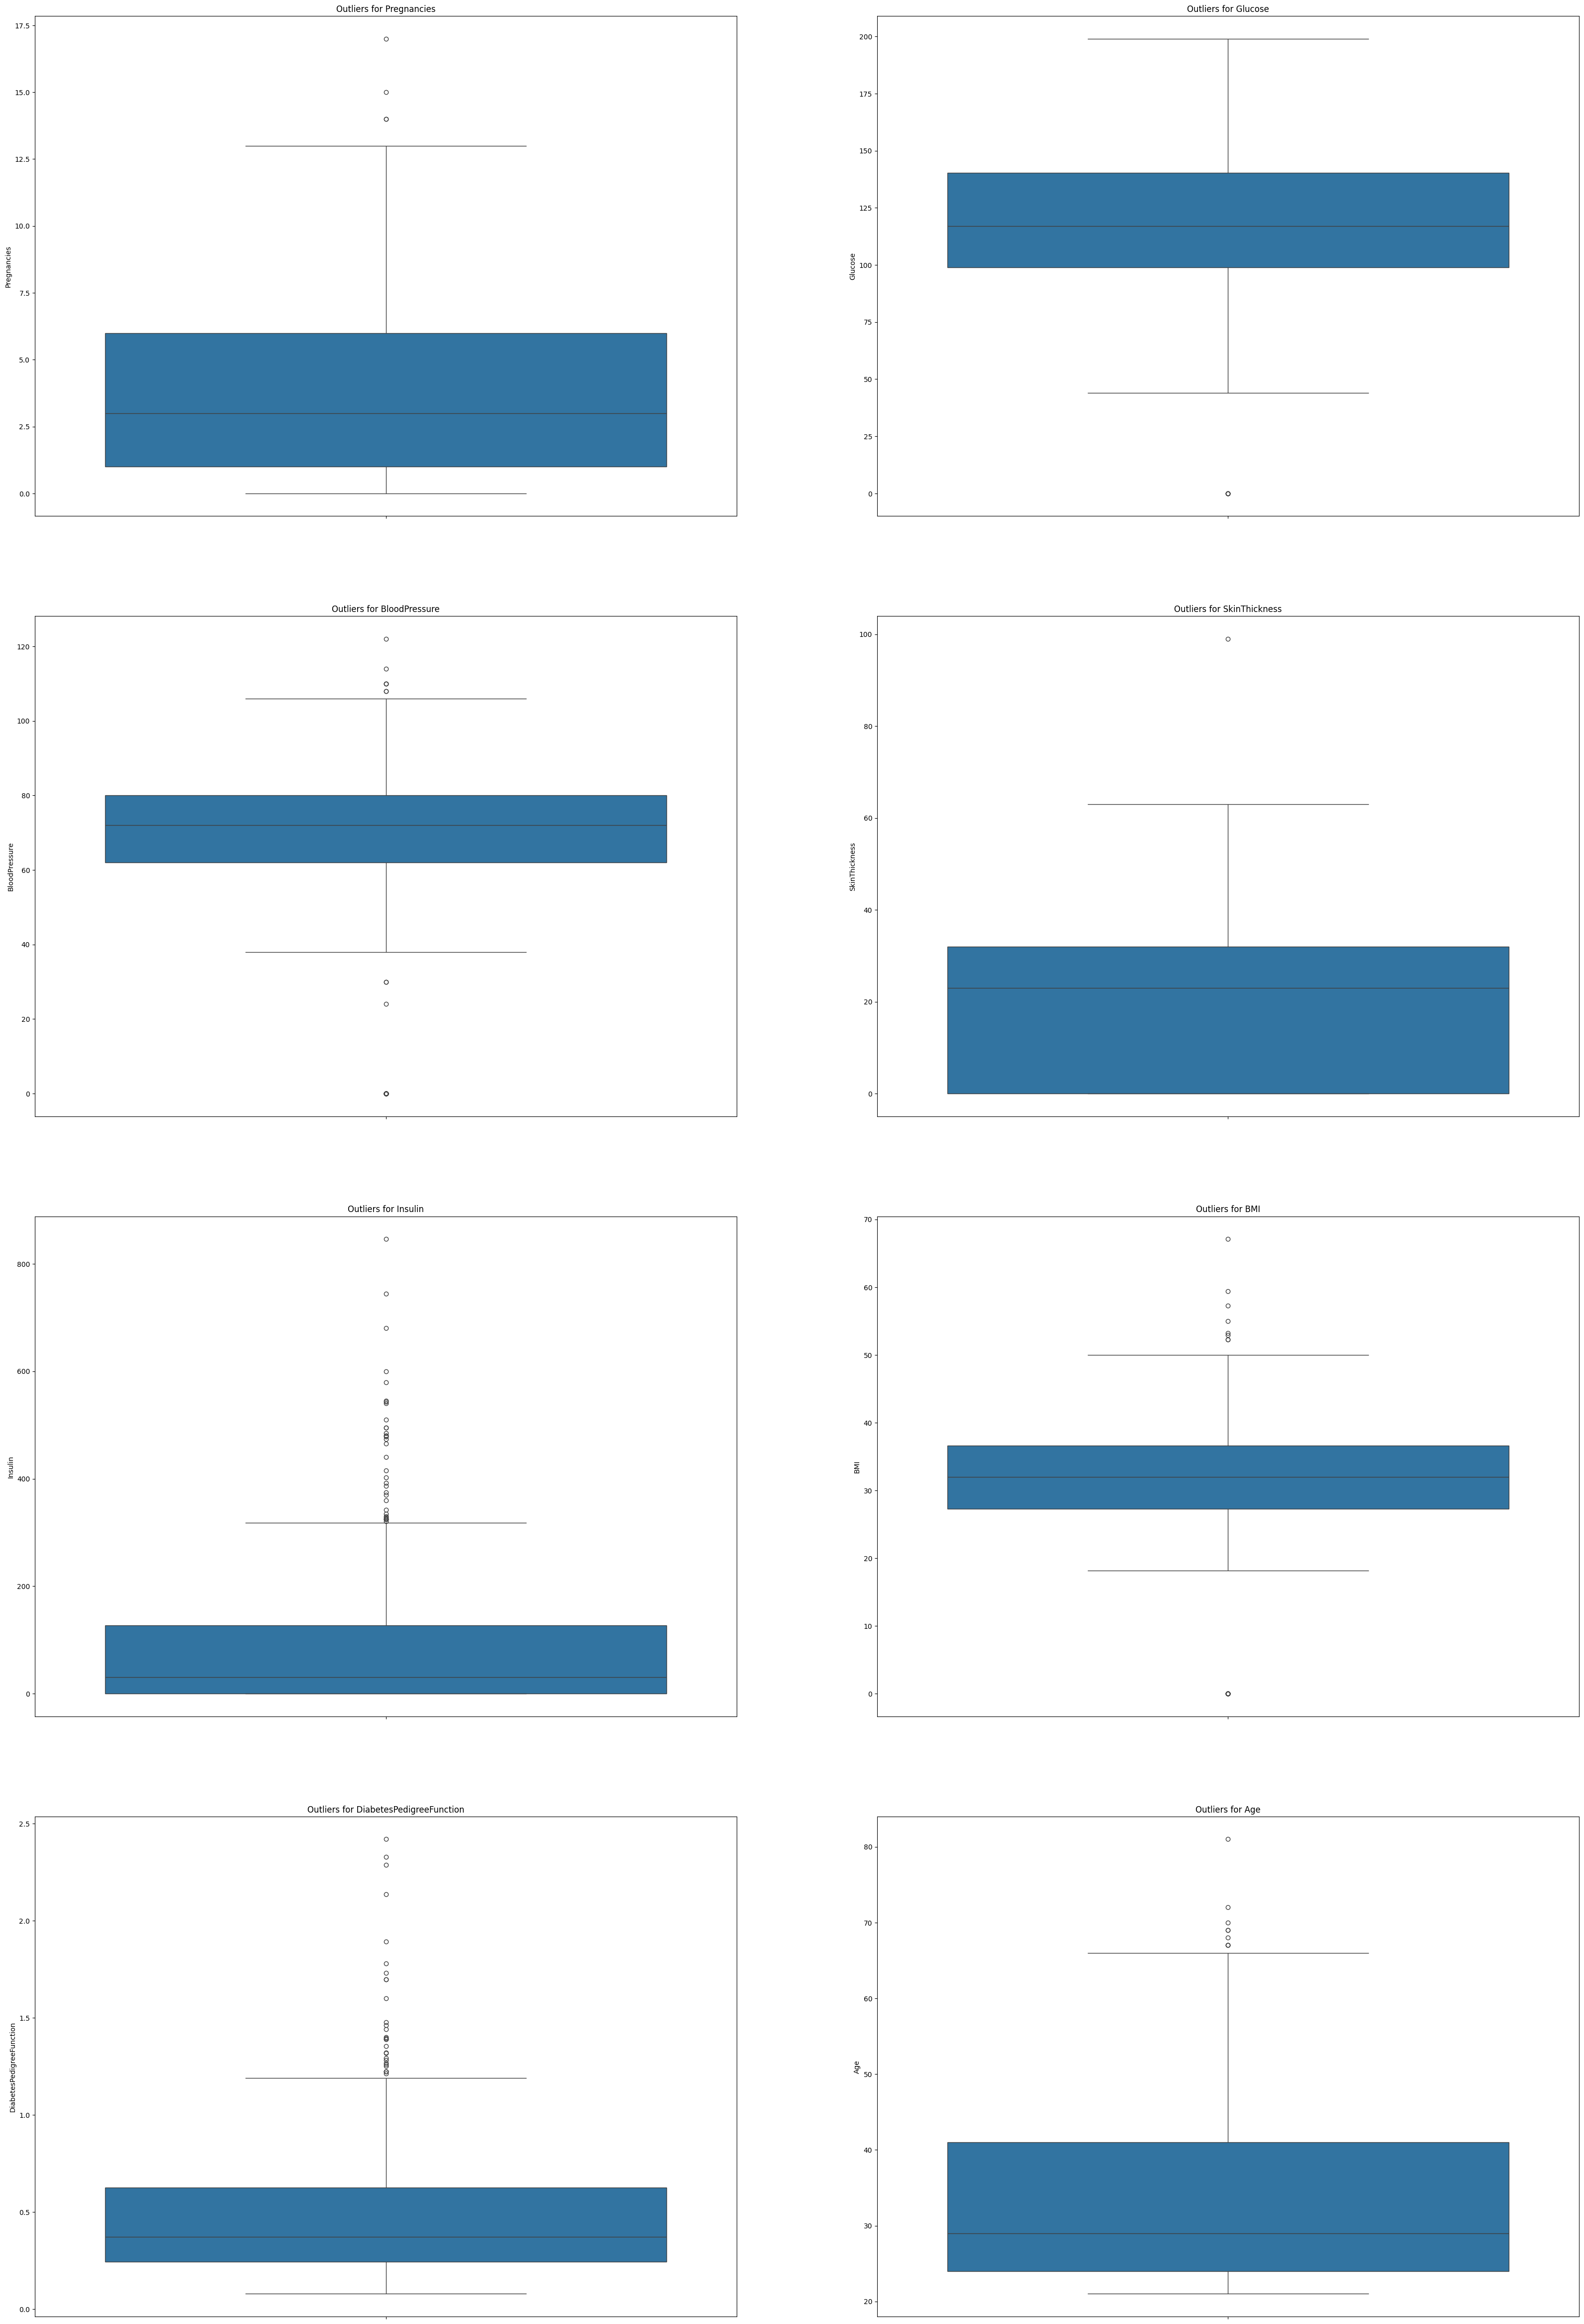

In [43]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(40,60))
axes = axes.flatten()
df_col = df.drop('Outcome', axis=1)

for ax, column in zip(axes, df_col.columns):
    sns.boxplot(y=df[column], ax=ax)
    ax.set_title(f'Outliers for {column}')

plt.show()

### Blood Pressure (BP)

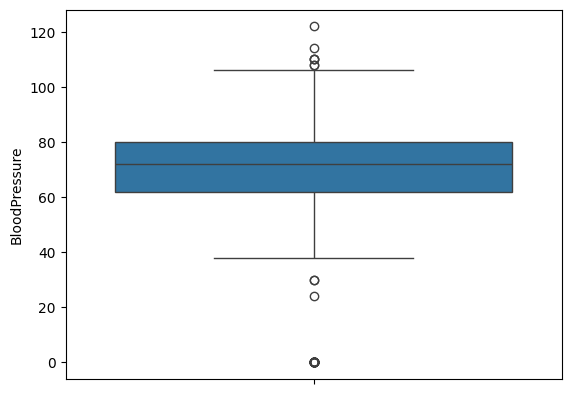

In [44]:
sns.boxplot(data=df, y='BloodPressure')
plt.show()

<Axes: xlabel='BloodPressure', ylabel='Density'>

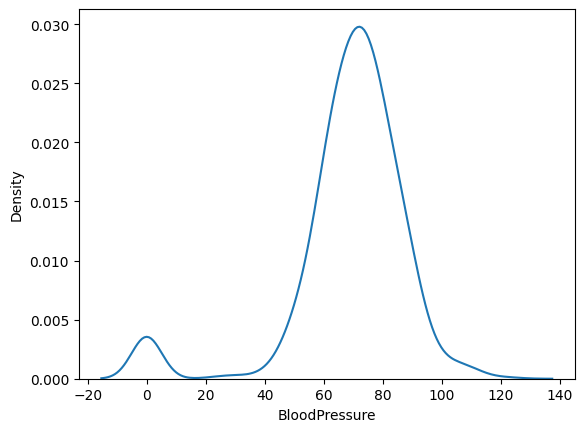

In [45]:
sns.kdeplot(data=df, x='BloodPressure')

In [77]:
print(f'The minimum BP {df['BloodPressure'].min()}')
print(f'The maximum BP {df['BloodPressure'].max()}')
print(f'The average BP {df['BloodPressure'].mean()}')
print(f'The median BP {df['BloodPressure'].median()}')
print(f'The mode BP {df['BloodPressure'].mode()}')

The minimum BP 0
The maximum BP 122
The average BP 69.10546875
The median BP 72.0
The mode BP 0    70
Name: BloodPressure, dtype: int64


Blood pressure for a living human being can't be zero, so we should either:
- Remove all the records where BP is 0.
- Update the value with the avg, median or mode. 

In [78]:
# finding the records that have zero results for BP, ST and BMI
df[(df['BloodPressure'] == 0) & (df['SkinThickness'] == 0) & (df['BMI'] == 0)]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,AgeGroup
49,7,105,0,0,0,0.0,0.305,24,0,20-24
60,2,84,0,0,0,0.0,0.304,21,0,20-24
81,2,74,0,0,0,0.0,0.102,22,0,20-24
426,0,94,0,0,0,0.0,0.256,25,0,25-29
494,3,80,0,0,0,0.0,0.174,22,0,20-24
522,6,114,0,0,0,0.0,0.189,26,0,25-29
706,10,115,0,0,0,0.0,0.261,30,1,30-34


In [79]:
# drop all rows where Blood Pressure, Skin Thickness and BMI are 0

df_update1 = df[(df['BloodPressure'] > 0) | (df['SkinThickness'] > 0) | (df['BMI'] > 0)]
df_update1

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,AgeGroup
0,6,148,72,35,0,33.6,0.627,50,1,50-59
1,1,85,66,29,0,26.6,0.351,31,0,30-34
2,8,183,64,0,0,23.3,0.672,32,1,30-34
3,1,89,66,23,94,28.1,0.167,21,0,20-24
4,0,137,40,35,168,43.1,2.288,33,1,30-34
...,...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0,60-81
764,2,122,70,27,0,36.8,0.340,27,0,25-29
765,5,121,72,23,112,26.2,0.245,30,0,30-34
766,1,126,60,0,0,30.1,0.349,47,1,45-49


In [80]:
# finding all rows where BP, ST are zeros
df_update1[(df_update1['BloodPressure'] == 0) & (df_update1['SkinThickness'] == 0)]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,AgeGroup
7,10,115,0,0,0,35.3,0.134,29,0,25-29
15,7,100,0,0,0,30.0,0.484,32,1,30-34
78,0,131,0,0,0,43.2,0.270,26,1,25-29
193,11,135,0,0,0,52.3,0.578,40,1,40-44
222,7,119,0,0,0,25.2,0.209,37,0,35-39
261,3,141,0,0,0,30.0,0.761,27,1,25-29
266,0,138,0,0,0,36.3,0.933,25,1,25-29
269,2,146,0,0,0,27.5,0.240,28,1,25-29
300,0,167,0,0,0,32.3,0.839,30,1,30-34
332,1,180,0,0,0,43.3,0.282,41,1,40-44


In [81]:
# drop the records where BP and ST are zero
df_update2 = df_update1[(df_update1['BloodPressure'] > 0) | (df_update1['SkinThickness'] > 0)]
len(df_update2)

735

In [82]:
# finding all records where ST and BMI are zeros
df_update2[(df_update2['SkinThickness']==0) & (df_update2['BMI'] == 0)]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,AgeGroup
9,8,125,96,0,0,0.0,0.232,54,1,50-59
684,5,136,82,0,0,0.0,0.640,69,0,60-81


In [83]:
# drop the records where BMI and ST are zero
df_update3 = df_update2[(df_update2['BMI'] > 0) | (df_update2['SkinThickness'] > 0)]
len(df_update3)

733

In [84]:
# finding all records where BP and BMI are zeros
df_update3[(df_update3['BloodPressure']==0) & (df_update3['BMI'] == 0)]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,AgeGroup


In [85]:
# two records remaning, we will try to impute with median value
df_update3[df_update3['BloodPressure']==0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,AgeGroup
172,2,87,0,23,0,28.9,0.773,25,0,25-29
357,13,129,0,30,0,39.9,0.569,44,1,40-44


<Axes: xlabel='BloodPressure', ylabel='Density'>

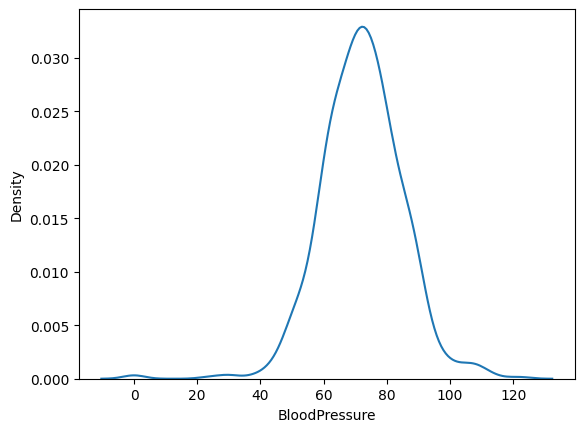

In [86]:
sns.kdeplot(data=df_update3, x='BloodPressure')

In [87]:
print(f'Minimum BP {df_update3['BloodPressure'].min()}')
print(f'Maximum BP {df_update3['BloodPressure'].max()}')
print(f'The average BP {df_update3['BloodPressure'].mean()}')
print(f'The median BP {df_update3['BloodPressure'].median()}')
print(f'The mode BP {df_update3['BloodPressure'].mode()}')

Minimum BP 0
Maximum BP 122
The average BP 72.16234652114598
The median BP 72.0
The mode BP 0    70
Name: BloodPressure, dtype: int64


In [88]:
# find the median per Age Group
filtered_df = df_update3[df_update3['BloodPressure'] > 0]
median_BP_ageGroup = filtered_df.groupby('AgeGroup', observed=False)['BloodPressure'].median().reset_index()
median_BP_ageGroup

,AgeGroup,BloodPressure
0,20-24,65.5
1,25-29,70.0
2,30-34,72.0
3,35-39,74.0
4,40-44,74.0
5,45-49,78.0
6,50-59,78.0
7,60-81,78.0


In [89]:
# for AgeGroup 25-29, update the BP zero values to 70
# for AgeGroup 40-44, update the BP zero values to 74
df_update3.loc[(df_update3['BloodPressure'] == 0) & (df_update3['AgeGroup'] == '25-29'), 'BloodPressure'] = 70
df_update3.loc[(df_update3['BloodPressure'] == 0) & (df_update3['AgeGroup'] == '40-44'), 'BloodPressure'] = 74

df_update3[df_update3['BloodPressure']==0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,AgeGroup


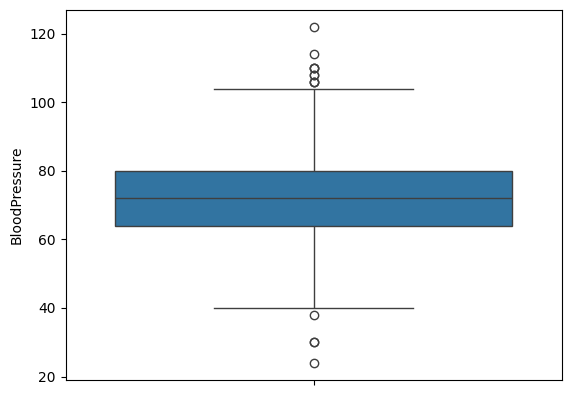

In [92]:
sns.boxplot(data=df_update3, y='BloodPressure')
plt.show()

## Skin Thinkness (ST)

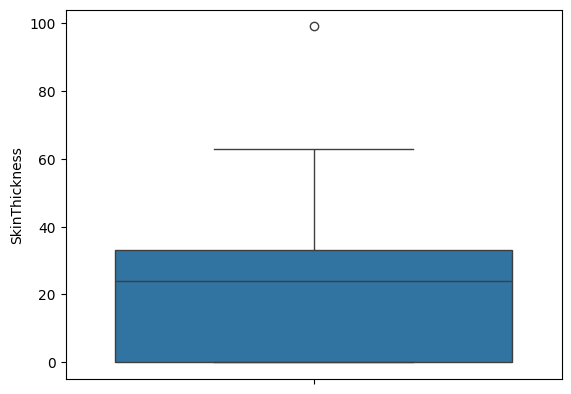

In [93]:
sns.boxplot(data=df_update3, y='SkinThickness')
plt.show()

In [94]:
print(f'The maximum skin thickness {df_update3['SkinThickness'].max()}')
print(f'The minimum skin thickness {df_update3['SkinThickness'].min()}')
print(f'The average skin thickness {df_update3['SkinThickness'].mean()}')
print(f'The median skin thickness {df_update3['SkinThickness'].median()}')
print(f'The mode skin thickness {df_update3['SkinThickness'].mode()}')

The maximum skin thickness 99
The minimum skin thickness 0
The average skin thickness 21.51705320600273
The median skin thickness 24.0
The mode skin thickness 0    0
Name: SkinThickness, dtype: int64


In [95]:
df_update3[df_update3['SkinThickness'] == 0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,AgeGroup
2,8,183,64,0,0,23.3,0.672,32,1,30-34
5,5,116,74,0,0,25.6,0.201,30,0,30-34
10,4,110,92,0,0,37.6,0.191,30,0,30-34
11,10,168,74,0,0,38.0,0.537,34,1,30-34
12,10,139,80,0,0,27.1,1.441,57,0,50-59
...,...,...,...,...,...,...,...,...,...,...
757,0,123,72,0,0,36.3,0.258,52,1,50-59
758,1,106,76,0,0,37.5,0.197,26,0,25-29
759,6,190,92,0,0,35.5,0.278,66,1,60-81
762,9,89,62,0,0,22.5,0.142,33,0,30-34


In [96]:
# find the median per Age Group
filtered_df = df_update3[df_update3['SkinThickness'] > 0]
median_ST = filtered_df.groupby('AgeGroup', )['SkinThickness'].median()
median_ST

C:\Users\WithA\AppData\Local\Temp\ipykernel_23448\2607599193.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_ST = filtered_df.groupby('AgeGroup', )['SkinThickness'].median()


AgeGroup
20-24    25.0
25-29    30.0
30-34    32.0
35-39    32.0
40-44    31.0
45-49    31.0
50-59    28.5
60-81    31.0
Name: SkinThickness, dtype: float64

In [97]:
df_update3.loc[df_update3['SkinThickness'] == 0, 'SkinThickness'] = df_update3.loc[df_update3['SkinThickness'] == 0, 'AgeGroup'].map(median_ST)
df_update3[df_update3['SkinThickness'] == 0]

C:\Users\WithA\AppData\Local\Temp\ipykernel_23448\632996806.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[32.  32.  32.  32.  28.5 32.  28.5 31.  31.  32.  30.  32.  32.  31.
 30.  31.  32.  32.  31.  28.5 31.  31.  32.  25.  31.  32.  25.  25.
 30.  30.  30.  31.  32.  30.  31.  25.  31.  32.  30.  28.5 31.  31.
 32.  31.  32.  32.  30.  32.  31.  31.  32.  32.  30.  31.  25.  32.
 25.  30.  28.5 31.  31.  30.  25.  30.  30.  30.  25.  31.  31.  30.
 32.  25.  31.  28.5 28.5 30.  31.  28.5 31.  28.5 30.  32.  30.  28.5
 32.  31.  31.  31.  32.  28.5 30.  32.  25.  31.  31.  31.  30.  32.
 30.  32.  30.  32.  28.5 31.  31.  30.  32.  30.  30.  30.  32.  32.
 25.  31.  30.  32.  28.5 25.  31.  31.  32.  32.  31.  28.5 25.  28.5
 31.  31.  25.  32.  25.  31.  31.  31.  28.5 32.  28.5 30.  32.  25.
 25.  32.  31.  31.  30.  31.  31.  32.  30.  32.  31.  25.  25.  25.
 31.  32.  25.  32.  32.  31.  25

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,AgeGroup


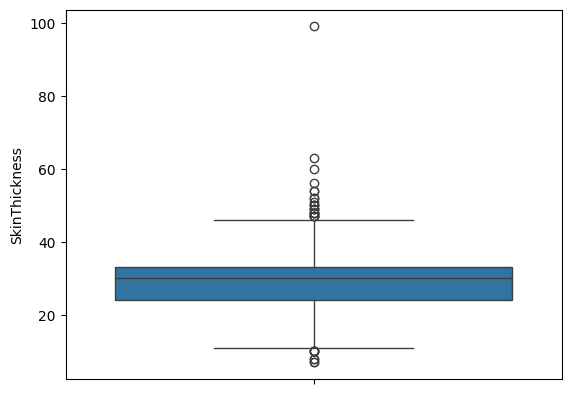

In [98]:
sns.boxplot(data=df_update3, y='SkinThickness')
plt.show()

In [99]:
print(f'The maximum skin thickness {df_update3['SkinThickness'].max()}')
print(f'The minimum skin thickness {df_update3['SkinThickness'].min()}')
print(f'The average skin thickness {df_update3['SkinThickness'].mean()}')
print(f'The median skin thickness {df_update3['SkinThickness'].median()}')
print(f'The mode skin thickness {df_update3['SkinThickness'].mode()}')

The maximum skin thickness 99.0
The minimum skin thickness 7.0
The average skin thickness 29.34924965893588
The median skin thickness 30.0
The mode skin thickness 0    32.0
Name: SkinThickness, dtype: float64


### BMI

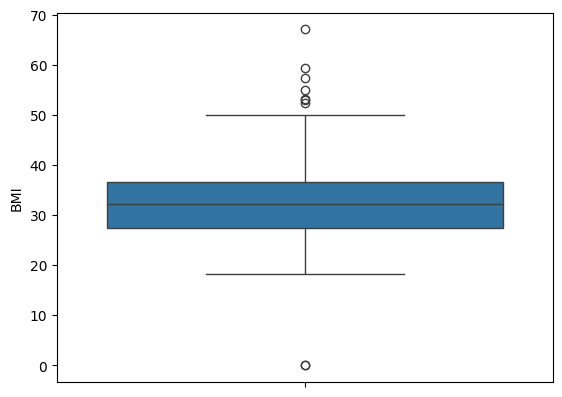

In [100]:
sns.boxplot(data=df_update3, y='BMI')
plt.show()

In [101]:
print(f'The maximum BMI {df_update3['BMI'].max()}')
print(f'The minimum BMI {df_update3['BMI'].min()}')
print(f'The average BMI {df_update3['BMI'].mean()}')
print(f'The median BMI {df_update3['BMI'].median()}')
print(f'The mode BMI {df_update3['BMI'].mode()}')

The maximum BMI 67.1
The minimum BMI 0.0
The average BMI 32.386630286493855
The median BMI 32.3
The mode BMI 0    32.0
Name: BMI, dtype: float64


In [102]:
df_update3[df_update3['BMI'] == 0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,AgeGroup
145,0,102,75,23.0,0,0.0,0.572,21,0,20-24
371,0,118,64,23.0,89,0.0,1.731,21,0,20-24


In [103]:
filtered_df = df_update3[df_update3['BMI'] > 0]
median_BMI = filtered_df.groupby('AgeGroup', )['BMI'].median()
median_BMI

C:\Users\WithA\AppData\Local\Temp\ipykernel_23448\3576796627.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_BMI = filtered_df.groupby('AgeGroup', )['BMI'].median()


AgeGroup
20-24    30.10
25-29    33.30
30-34    31.40
35-39    32.80
40-44    34.30
45-49    32.80
50-59    33.05
60-81    29.80
Name: BMI, dtype: float64

In [104]:
df_update3.loc[df_update3['BMI'] == 0, 'BMI'] = df_update3.loc[df_update3['BMI'] == 0, 'AgeGroup'].map(median_BMI)
df_update3[df_update3['BMI'] == 0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,AgeGroup


## Insulin

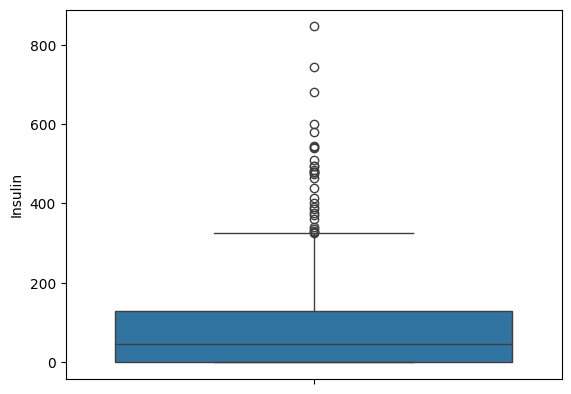

In [108]:
sns.boxplot(data=df_update3, y='Insulin')
plt.show()

In [107]:
print(f'Maximum skin insulin {df['Insulin'].max()}')
print(f'Minimum skin insulin {df['Insulin'].min()}')
print(f'average skin insulin {df['Insulin'].mean()}')
print(f'median skin insulin {df['Insulin'].median()}')
print(f'mode skin insulin {df['Insulin'].mode()}')

Maximum skin insulin 846
Minimum skin insulin 0
average skin insulin 79.79947916666667
median skin insulin 30.5
mode skin insulin 0    0
Name: Insulin, dtype: int64
